In [1]:
from funcs import *
from multi_funcs import *

In [2]:
results = f_simulate(100, 1000, 3)

In [5]:
results[0][1][1]

,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,555,120,107,0,0,1,False,0.563739,0.828731,0.779101,True
1,904,904,904,1,2,1,False,0.515871,0.515871,0.515871,False
2,755,738,515,2,0,1,False,0.273667,0.385521,0.956628,False
3,119,82,973,3,0,1,False,0.559822,0.247208,0.064513,True
4,26,709,709,4,1,1,False,0.949933,0.303723,0.303723,False
...,...,...,...,...,...,...,...,...,...,...,...
834,24,24,24,995,2,1,False,0.853518,0.853518,0.853518,False
835,271,348,348,996,1,1,False,0.398408,0.573748,0.573748,False
836,348,992,992,997,1,1,False,0.182765,0.885680,0.885680,True
837,432,998,833,998,0,1,False,0.945336,0.528314,0.769856,False


In [ ]:
def obtain_n_diffs(results):
    '''
    Takes the results from a batch of simulations
    and returns a list of tuples. Where first term is the difference, second term is the length of initial matches. 
    '''
    relevant = [[item[1], item[4]] for item in results]
    differences = [(len(find_diff(item[0], item[1])), len(item[0])) for item in relevant]
    percent_diff = [item[0]/item[1] for item in differences]
    return differences, percent_diff

In [20]:
differences, pct_diff = obtain_n_diffs(results)

In [21]:
df = make_df(7000, 7, differences, pct_diff, save = True)

In [64]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/')]

In [131]:
def concat(list_of_files):
    '''
    Takes a list of files and concatenates them into a single dataframe
    '''
    li = []
    for filename in list_of_files:
        df = pd.read_csv('data/simulations/' + filename, index_col=None, header=0)
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame

In [93]:
df = concat(onlyfiles)

In [94]:
import seaborn as sns

In [95]:
df =df[df['k']!=10]

In [96]:
df

,Unnamed: 0,n,k,differences,percent_diff,matches
0,0,10000,3,0,0.000000,8437
1,1,10000,3,0,0.000000,8438
2,2,10000,3,0,0.000000,8429
3,3,10000,3,0,0.000000,8398
4,4,10000,3,0,0.000000,8411
...,...,...,...,...,...,...
11095,995,500,5,0,0.000000,457
11096,996,500,5,0,0.000000,456
11097,997,500,5,8,0.017279,463
11098,998,500,5,0,0.000000,459


In [109]:
grouped = df.groupby(by = ['k', 'n']).mean()

In [110]:
grouped

Unnamed: 0  differences  percent_diff   matches
k n                                                     
3 100         499.5        0.412      0.004911    84.356
  500         499.5        0.426      0.001015   420.490
  1000        499.5        0.422      0.000502   840.634
  5000        499.5        0.370      0.000088  4203.412
  10000       499.5        0.370      0.000044  8405.988
5 100         499.5        3.910      0.042896    91.070
  500         499.5        4.628      0.010174   454.811
  1000        499.5        5.068      0.005576   908.912
  5000        499.5        5.352      0.001178  4542.926
  10000       499.5        5.274      0.000581  9084.155

In [112]:
import math

In [119]:
grouped['formatted'] = np.exp(1/(100*grouped.percent_diff))
grouped.reset_index(inplace = True)

In [120]:
grouped

,k,n,Unnamed: 0,differences,percent_diff,matches,formatted
0,3,100,499.5,0.412,0.004911,84.356,7.661897e+00
1,3,500,499.5,0.426,0.001015,420.490,1.893336e+04
2,3,1000,499.5,0.422,0.000502,840.634,4.514321e+08
3,3,5000,499.5,0.370,0.000088,4203.412,2.054012e+49
4,3,10000,499.5,0.370,0.000044,8405.988,4.485368e+98
5,5,100,499.5,3.910,0.042896,91.070,1.262533e+00
6,5,500,499.5,4.628,0.010174,454.811,2.672287e+00
7,5,1000,499.5,5.068,0.005576,908.912,6.010430e+00
8,5,5000,499.5,5.352,0.001178,4542.926,4.852764e+03
9,5,10000,499.5,5.274,0.000581,9084.155,3.021336e+07


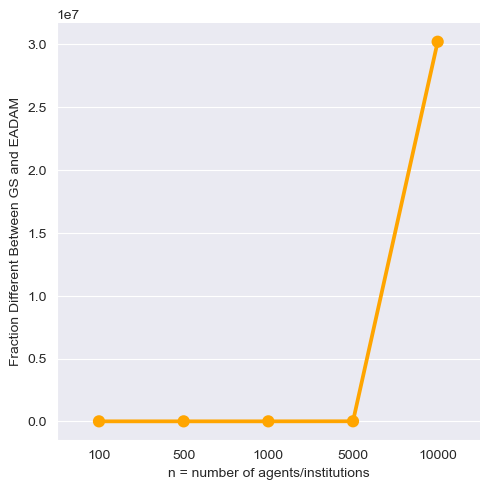

In [130]:
sns.set_style('darkgrid')
g = sns.catplot(x = 'n', y = 'formatted', data = grouped[grouped['k']==5], kind = 'point', color='orange')
g.set_axis_labels('n = number of agents/institutions', 'Fraction Different Between GS and EADAM')

In [104]:
grouped

Unnamed: 0  differences  percent_diff   matches           exp
k n                                                                   
3 100         499.5        0.412      0.004911    84.356  2.714138e+88
  500         499.5        0.426      0.001015   420.490           inf
  1000        499.5        0.422      0.000502   840.634           inf
  5000        499.5        0.370      0.000088  4203.412           inf
  10000       499.5        0.370      0.000044  8405.988           inf
5 100         499.5        3.910      0.042896    91.070  1.331328e+10
  500         499.5        4.628      0.010174   454.811  4.878752e+42
  1000        499.5        5.068      0.005576   908.912  7.772341e+77
  5000        499.5        5.352      0.001178  4542.926           inf
  10000       499.5        5.274      0.000581  9084.155           inf

In [ ]:
df['percent_diff']

In [84]:
df = pd.read_csv('data/simulations/n_5000_k_5.csv', index_col=None, header=0)

In [85]:
df

,Unnamed: 0,n,k,differences,percent_diff,matches
0,0,5000,5,0,0.000000,4559
1,1,5000,5,0,0.000000,4546
2,2,5000,5,24,0.005292,4535
3,3,5000,5,0,0.000000,4551
4,4,5000,5,0,0.000000,4531
...,...,...,...,...,...,...
995,995,5000,5,0,0.000000,4542
996,996,5000,5,18,0.003960,4546
997,997,5000,5,0,0.000000,4554
998,998,5000,5,10,0.002205,4536


C:\Users\v-kirdwivedi\AppData\Local\Temp\ipykernel_30384\2979027099.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['differences'], bins = 20, stat = 'density', common_norm = False, kde = True, palette = 'mako')


<Axes: xlabel='differences', ylabel='Density'>

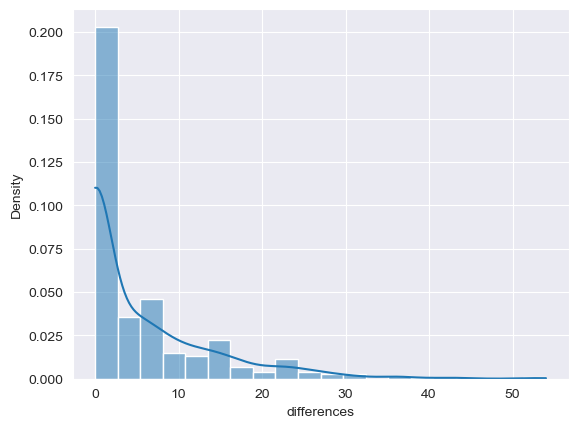

In [88]:
sns.histplot(df['differences'], bins = 20, stat = 'density', common_norm = False, kde = True, palette = 'mako')

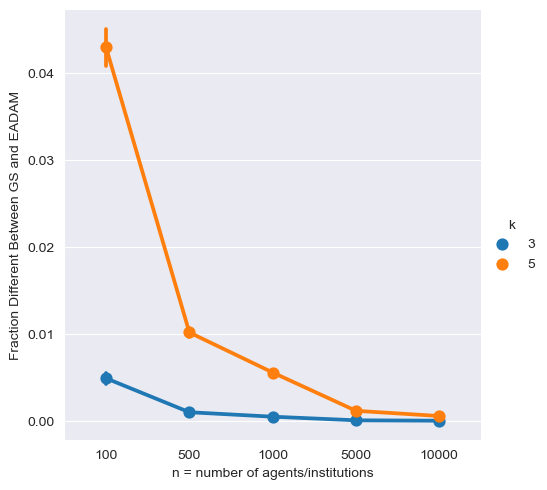

In [56]:
sns.set_style('darkgrid')
g = sns.catplot(x = 'n', y = 'percent_diff', data = df, kind = 'point', errorbar = 'se', hue = 'k')
g.set_axis_labels('n = number of agents/institutions', 'Fraction Different Between GS and EADAM')


Text(0, 0.5, 'Shared Matched')

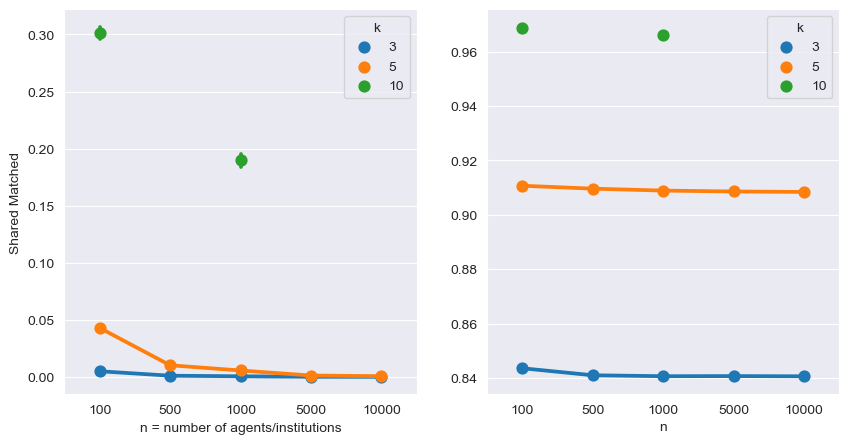

In [67]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.set_style('darkgrid')
sns.pointplot(x = 'n', y = 'percent_diff', data = df, errorbar = 'se', hue = 'k', ax = axs[0])
axs[0].set_xlabel('n = number of agents/institutions')
axs[0].set_ylabel('Fraction Different Between GS and EADAM')

sns.pointplot(x = df['n'], y= df['matches']/df['n'], errorbar = 'se', hue = df['k'], ax = axs[1])
axs[0].set_xlabel('n = number of agents/institutions')
axs[0].set_ylabel('Shared Matched')

In [6]:
k = [4,6,7,8,9]
n = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

In [ ]:
for i in k:
    for j in n:
        results = f_simulate(100, j, i)
        ## Then you want to save all the tables and stuff? That seems not ideal. 

Need new function which takes as inputs results (100 of them), and spits out the desired results. Note that for this we don't even actually need to run EADAM. Might still be interested in doing so but we don't need to. 

In [44]:
preferences = results[0][0].iloc[:, 0:4]

In [45]:
matches = results[0][1][1]

In [46]:
matches.iloc[:,[0,3,4]]

,0,student_id,applications
0,744,1,2
1,12,2,0
2,933,7,0
3,270,8,1
4,845,9,1
...,...,...,...
817,274,993,0
818,487,996,2
819,342,997,0
820,785,998,0


Now, we want a function that, looks at these two tables and creates a new table in which each agent points to the matches they would strictly prefer to their own matches. So that's all the matches they didn't get. 

1. For an agent, get matches better than current.
2. Use matches to translate that to people (maybe a merge here). 

In [47]:
## Start by dropping all unmatched agents from the preferences table.
preferences = preferences[preferences['student_id'].isin(matches['student_id'])]

In [48]:
preferences.reset_index(inplace = True, drop = True)

In [49]:
preferences['rejections'] = matches.applications

In [50]:
preferences.T

,0,1,2,3,4,5,6,7,8,9,...,812,813,814,815,816,817,818,819,820,821
0,10,12,933,559,423,153,42,795,471,814,...,855,878,895,839,652,274,298,342,785,551
1,881,219,755,270,845,568,787,243,611,934,...,760,314,455,129,907,496,437,912,657,125
2,744,311,257,553,96,601,923,12,569,620,...,566,775,386,986,445,884,487,753,883,160
student_id,1,2,7,8,9,10,11,14,15,16,...,988,989,990,991,992,993,996,997,998,999
rejections,2,0,0,1,1,1,2,0,1,0,...,1,2,0,0,1,0,2,0,0,0


In [51]:
preferences

,0,1,2,student_id,rejections
0,10,881,744,1,2
1,12,219,311,2,0
2,933,755,257,7,0
3,559,270,553,8,1
4,423,845,96,9,1
...,...,...,...,...,...
817,274,496,884,993,0
818,298,437,487,996,2
819,342,912,753,997,0
820,785,657,883,998,0


In [52]:
relevant = preferences[preferences['rejections'] != 0]

In [53]:
relevant

,0,1,2,student_id,rejections
0,10,881,744,1,2
3,559,270,553,8,1
4,423,845,96,9,1
5,153,568,601,10,1
6,42,787,923,11,2
...,...,...,...,...,...
811,175,554,725,987,1
812,855,760,566,988,1
813,878,314,775,989,2
816,652,907,445,992,1


In [54]:
mask = np.where(relevant['rejections'] == 1, True, False)

In [55]:
relevant.loc[mask, [1,2]] = -100
relevant.loc[~mask, [2]] = -100

In [56]:
relevant.set_index('student_id', inplace = True)   

In [57]:
pointing = pd.DataFrame(relevant.iloc[:, :3].stack(level = 0)).reset_index()

In [58]:
pointing = pointing[pointing[0] != -100]

In [59]:
pointing

,student_id,level_1,0
0,1,0,10
1,1,1,881
3,8,0,559
6,9,0,423
9,10,0,153
...,...,...,...
1116,989,0,878
1117,989,1,314
1119,992,0,652
1122,996,0,298


In [60]:
to_merge = matches.loc[:,[0, 'student_id']]

In [62]:
pointing = pointing.merge(to_merge, on = 0)

In [63]:
pointing

,student_id_x,level_1,0,student_id_y
0,1,0,10,128
1,1,1,881,264
2,8,0,559,739
3,608,0,559,739
4,9,0,423,828
...,...,...,...,...
490,981,0,373,415
491,987,0,175,540
492,989,0,878,531
493,989,1,314,385


Ok, so in theory we've now got what we needed. Each of those rows represents the edge of graph. We're looking for cycles in this graph. Will be wanting to turn this into a function. Then I'm hoping there's a reasonably easy way to turn them into a graph and from there use the tarjan algorithm that Clayton gave me. 

In [39]:
import tarjan_alg

In [25]:
normalizer = pd.DataFrame(pd.concat([pointing['student_id'], pointing['0_y']], axis = 0).unique())
normalizer['new_id'] = normalizer.index

In [26]:
normalizer

,0,new_id
0,1,0
1,8,1
2,9,2
3,10,3
4,11,4
...,...,...
598,20,598
599,256,599
600,760,600
601,775,601


In [40]:
G = tarjan_alg.Graph(len(normalizer))

In [28]:
pointing = pointing.merge(normalizer, left_on = 'student_id', right_on = 0)

In [29]:
pointing = pointing.merge(normalizer, left_on = '0_y', right_on = 0)

C:\Users\v-kirdwivedi\AppData\Local\Temp\ipykernel_23172\353542886.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pointing = pointing.merge(normalizer, left_on = '0_y', right_on = 0)


In [30]:
pairs = pointing[['new_id_x', 'new_id_y']]

In [38]:
pointing

,student_id,level_1,0_x,0_y,0_x,new_id_x,0_y,new_id_y
0,1,0,10,744,1,0,744,281
1,1,1,881,744,1,0,744,281
2,8,0,559,270,8,1,270,375
3,9,0,423,845,9,2,845,376
4,10,0,153,568,10,3,568,219
...,...,...,...,...,...,...,...,...
490,989,0,878,775,989,372,775,601
491,989,1,314,775,989,372,775,601
492,992,0,652,907,992,373,907,347
493,996,0,298,487,996,374,487,602


In [41]:
for i in range(len(pairs)):
    G.addEdge(pairs.iloc[i, 0], pairs.iloc[i, 1])

In [42]:
total = G.SCC()

552 
281 
0 
375 
1 
376 
2 
514 
219 
3 
377 
4 
378 
5 
425 
81 
6 
379 
7 
380 
8 
381 
9 
532 
247 
103 
10 
578 
333 
36 
11 
382 
12 
383 
13 
384 
14 
385 
15 
386 
17 
324 
16 
539 
256 
70 
18 
387 
19 
594 
363 
89 
55 
20 
560 
298 
21 
416 
68 
52 
38 
22 
582 
339 
23 
388 
24 
389 
25 
390 
26 
391 
27 
392 
28 
393 
29 
488 
182 
357 
210 
30 
547 
270 
31 
394 
32 
395 
33 
396 
34 
397 
35 
589 
354 
37 
599 
369 
343 
39 
398 
40 
399 
41 
400 
42 
401 
43 
402 
44 
403 
45 
404 
46 
525 
234 
175 
356 
66 
47 
405 
48 
196 49 
406 
50 
51 
407 
53 
54 
408 
56 
409 
57 
410 
58 
411 
59 
557 
294 
60 
412 
61 
413 
62 
447 
114 
63 
593 
361 
221 
64 
414 
65 
415 
67 
417 
69 
418 
71 
419 
72 
597 
367 
327 
73 
74 
420 
75 
421 
76 
422 
77 
362 
78 
423 
79 
424 
80 
450 
120 
82 
83 
426 
84 
427 
85 
428 
86 
429 
87 
430 
88 
90 
474 
156 
91 
431 
92 
127 
93 
432 
94 
516 
222 
95 
433 
96 
434 
97 
435 
98 
545 
266 
99 
436 
100 
591 
359 
101 
437 
102 
4

In [43]:
total

1